In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from parcels import ParcelsRandom

In [2]:
sink_speed_mean = 0.6
sink_speed_sd = 0.3
swim_speed_mean = 2.4
swim_speed_sd = 2

In [12]:
sinks, swims = [], []

for _ in range(1_000_000):
    sink_pref = ParcelsRandom.normalvariate(sink_speed_mean, sink_speed_sd)
    if sink_pref > sink_speed_mean + sink_speed_sd:
        sink_pref = sink_speed_mean + sink_speed_sd * ParcelsRandom.uniform(0, 1)
    elif sink_pref < sink_speed_mean - sink_speed_sd:
        sink_pref = sink_speed_mean - sink_speed_sd * ParcelsRandom.uniform(0, 1)
    sinks.append(sink_pref)

    swim_pref = ParcelsRandom.normalvariate(swim_speed_mean, swim_speed_sd)
    if swim_pref > swim_speed_mean + swim_speed_sd:
        swim_pref = swim_speed_mean + swim_speed_sd * ParcelsRandom.uniform(0, 1)
    elif swim_pref < swim_speed_mean - swim_speed_sd:
        swim_pref = swim_speed_mean - swim_speed_sd * ParcelsRandom.uniform(0, 1)
    swims.append(swim_pref)

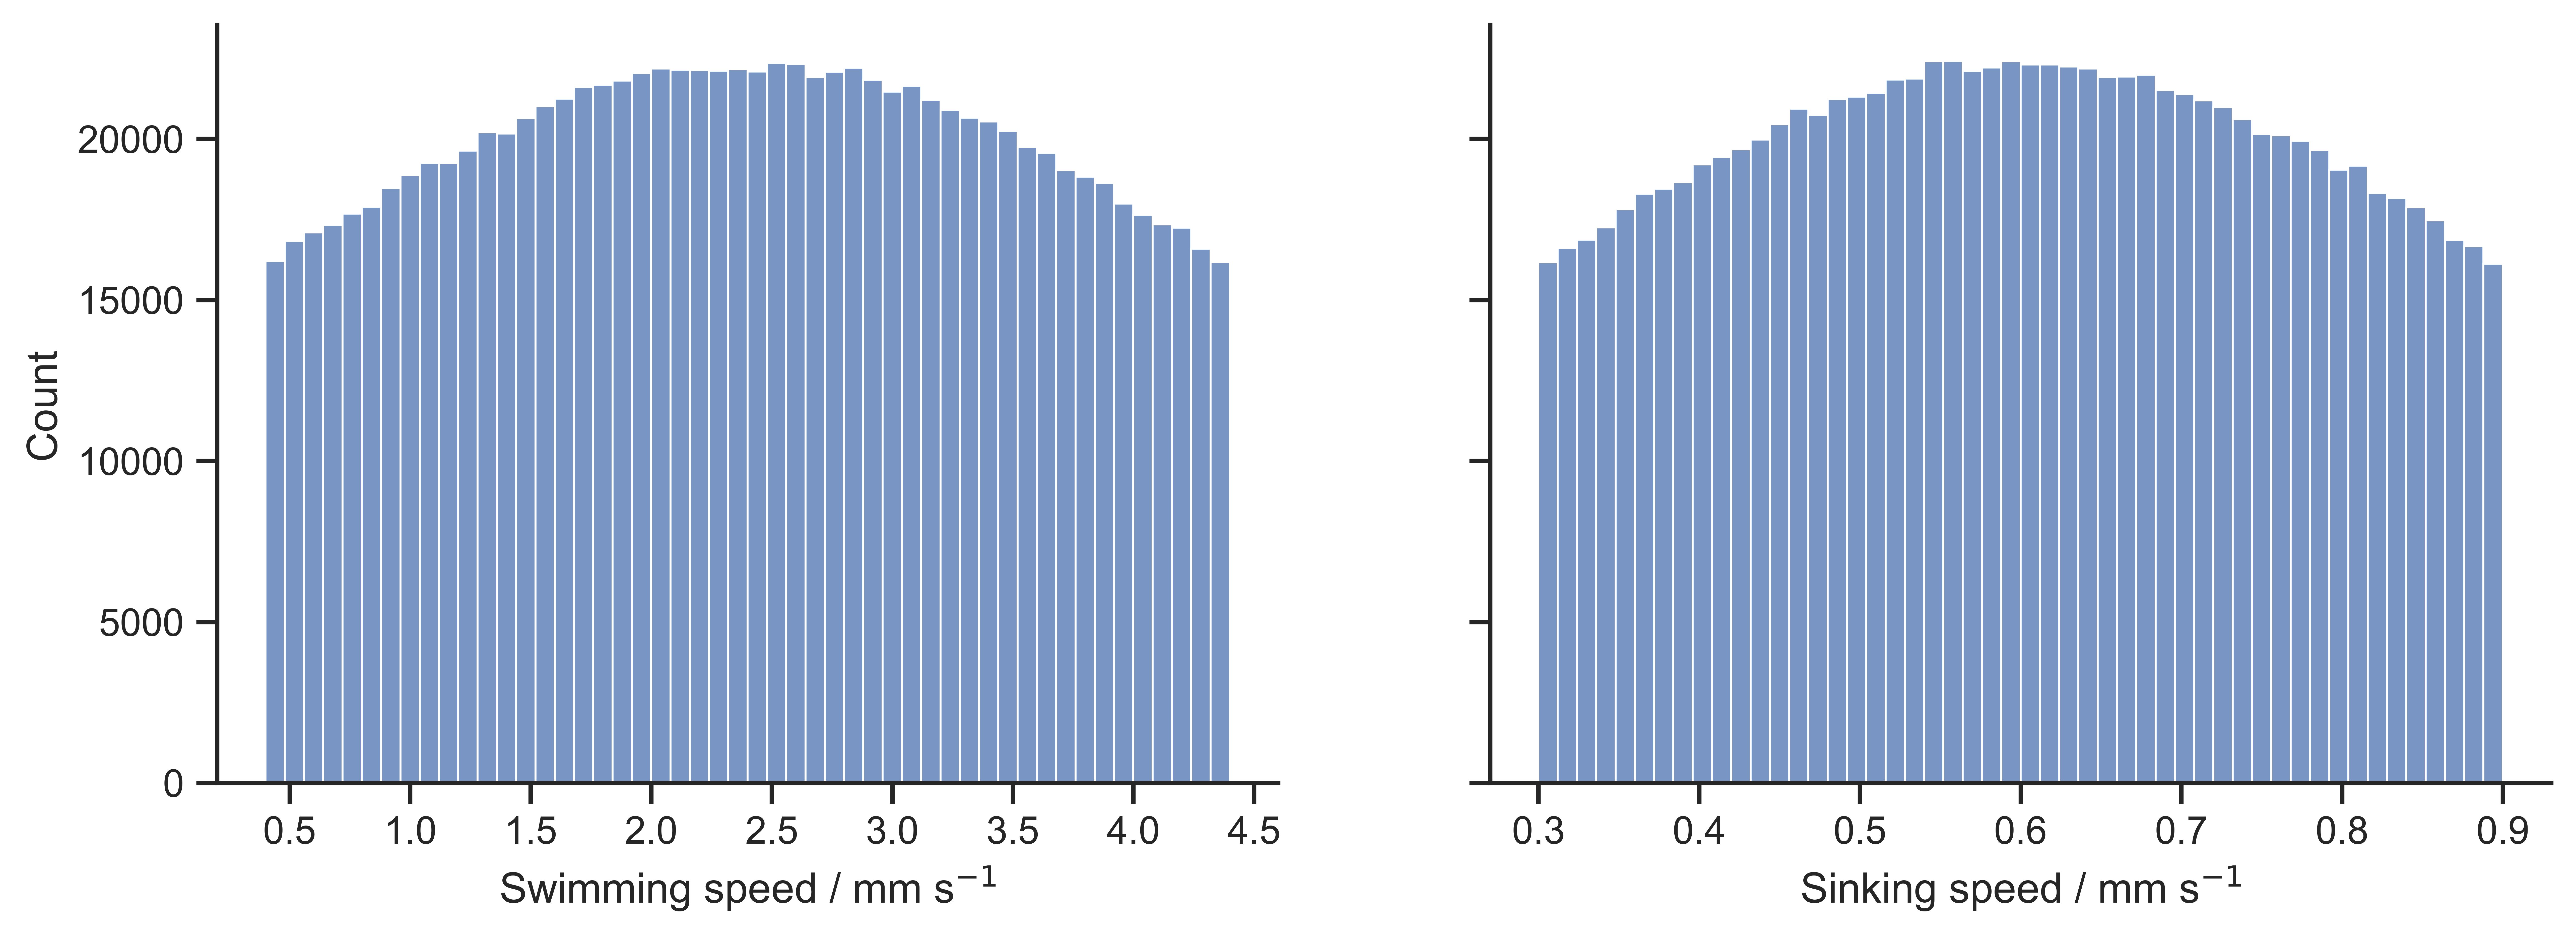

In [31]:
sns.set(font='Arial')
sns.set_style('ticks')
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), dpi=1000, sharey=True)
sns.histplot(swims, bins=50, ax=ax[0])
ax[0].set(xlabel='Swimming speed / mm s$^{-1}$')
sns.histplot(sinks, bins=50, ax=ax[1])
ax[1].set(xlabel='Sinking speed / mm s$^{-1}$')
sns.despine()

plt.show()

In [32]:
mld = 11.75
bathy = 138.92

min_depth = 0.51
max_mean_depth = 20
max_depth_range = 10
squish_factor = 0.75
depths = []
for _ in range(1_000_000):
    # Mean particle depth is the minimum magnitude of three parameters
    depth_mean = min(min(mld, bathy / 2), max_mean_depth)

    # Range of acceptable depths about the mean is the minimum magnitude of three parameters
    depth_range = min(
        min(squish_factor * (depth_mean - min_depth), squish_factor * (bathy - depth_mean)), max_depth_range)

    # Preferred particle depth is a normal distribution approximately limited by the depth range around the mean depth
    depth_pref = depth_mean + ParcelsRandom.normalvariate(0, depth_range / 2)

    if depth_pref > depth_mean + depth_range:
        depth_pref = depth_mean + depth_range * ParcelsRandom.uniform(0, 1)
    elif depth_pref < depth_mean - depth_range:
        depth_pref = depth_mean - depth_range * ParcelsRandom.uniform(0, 1)
    depths.append(depth_pref)

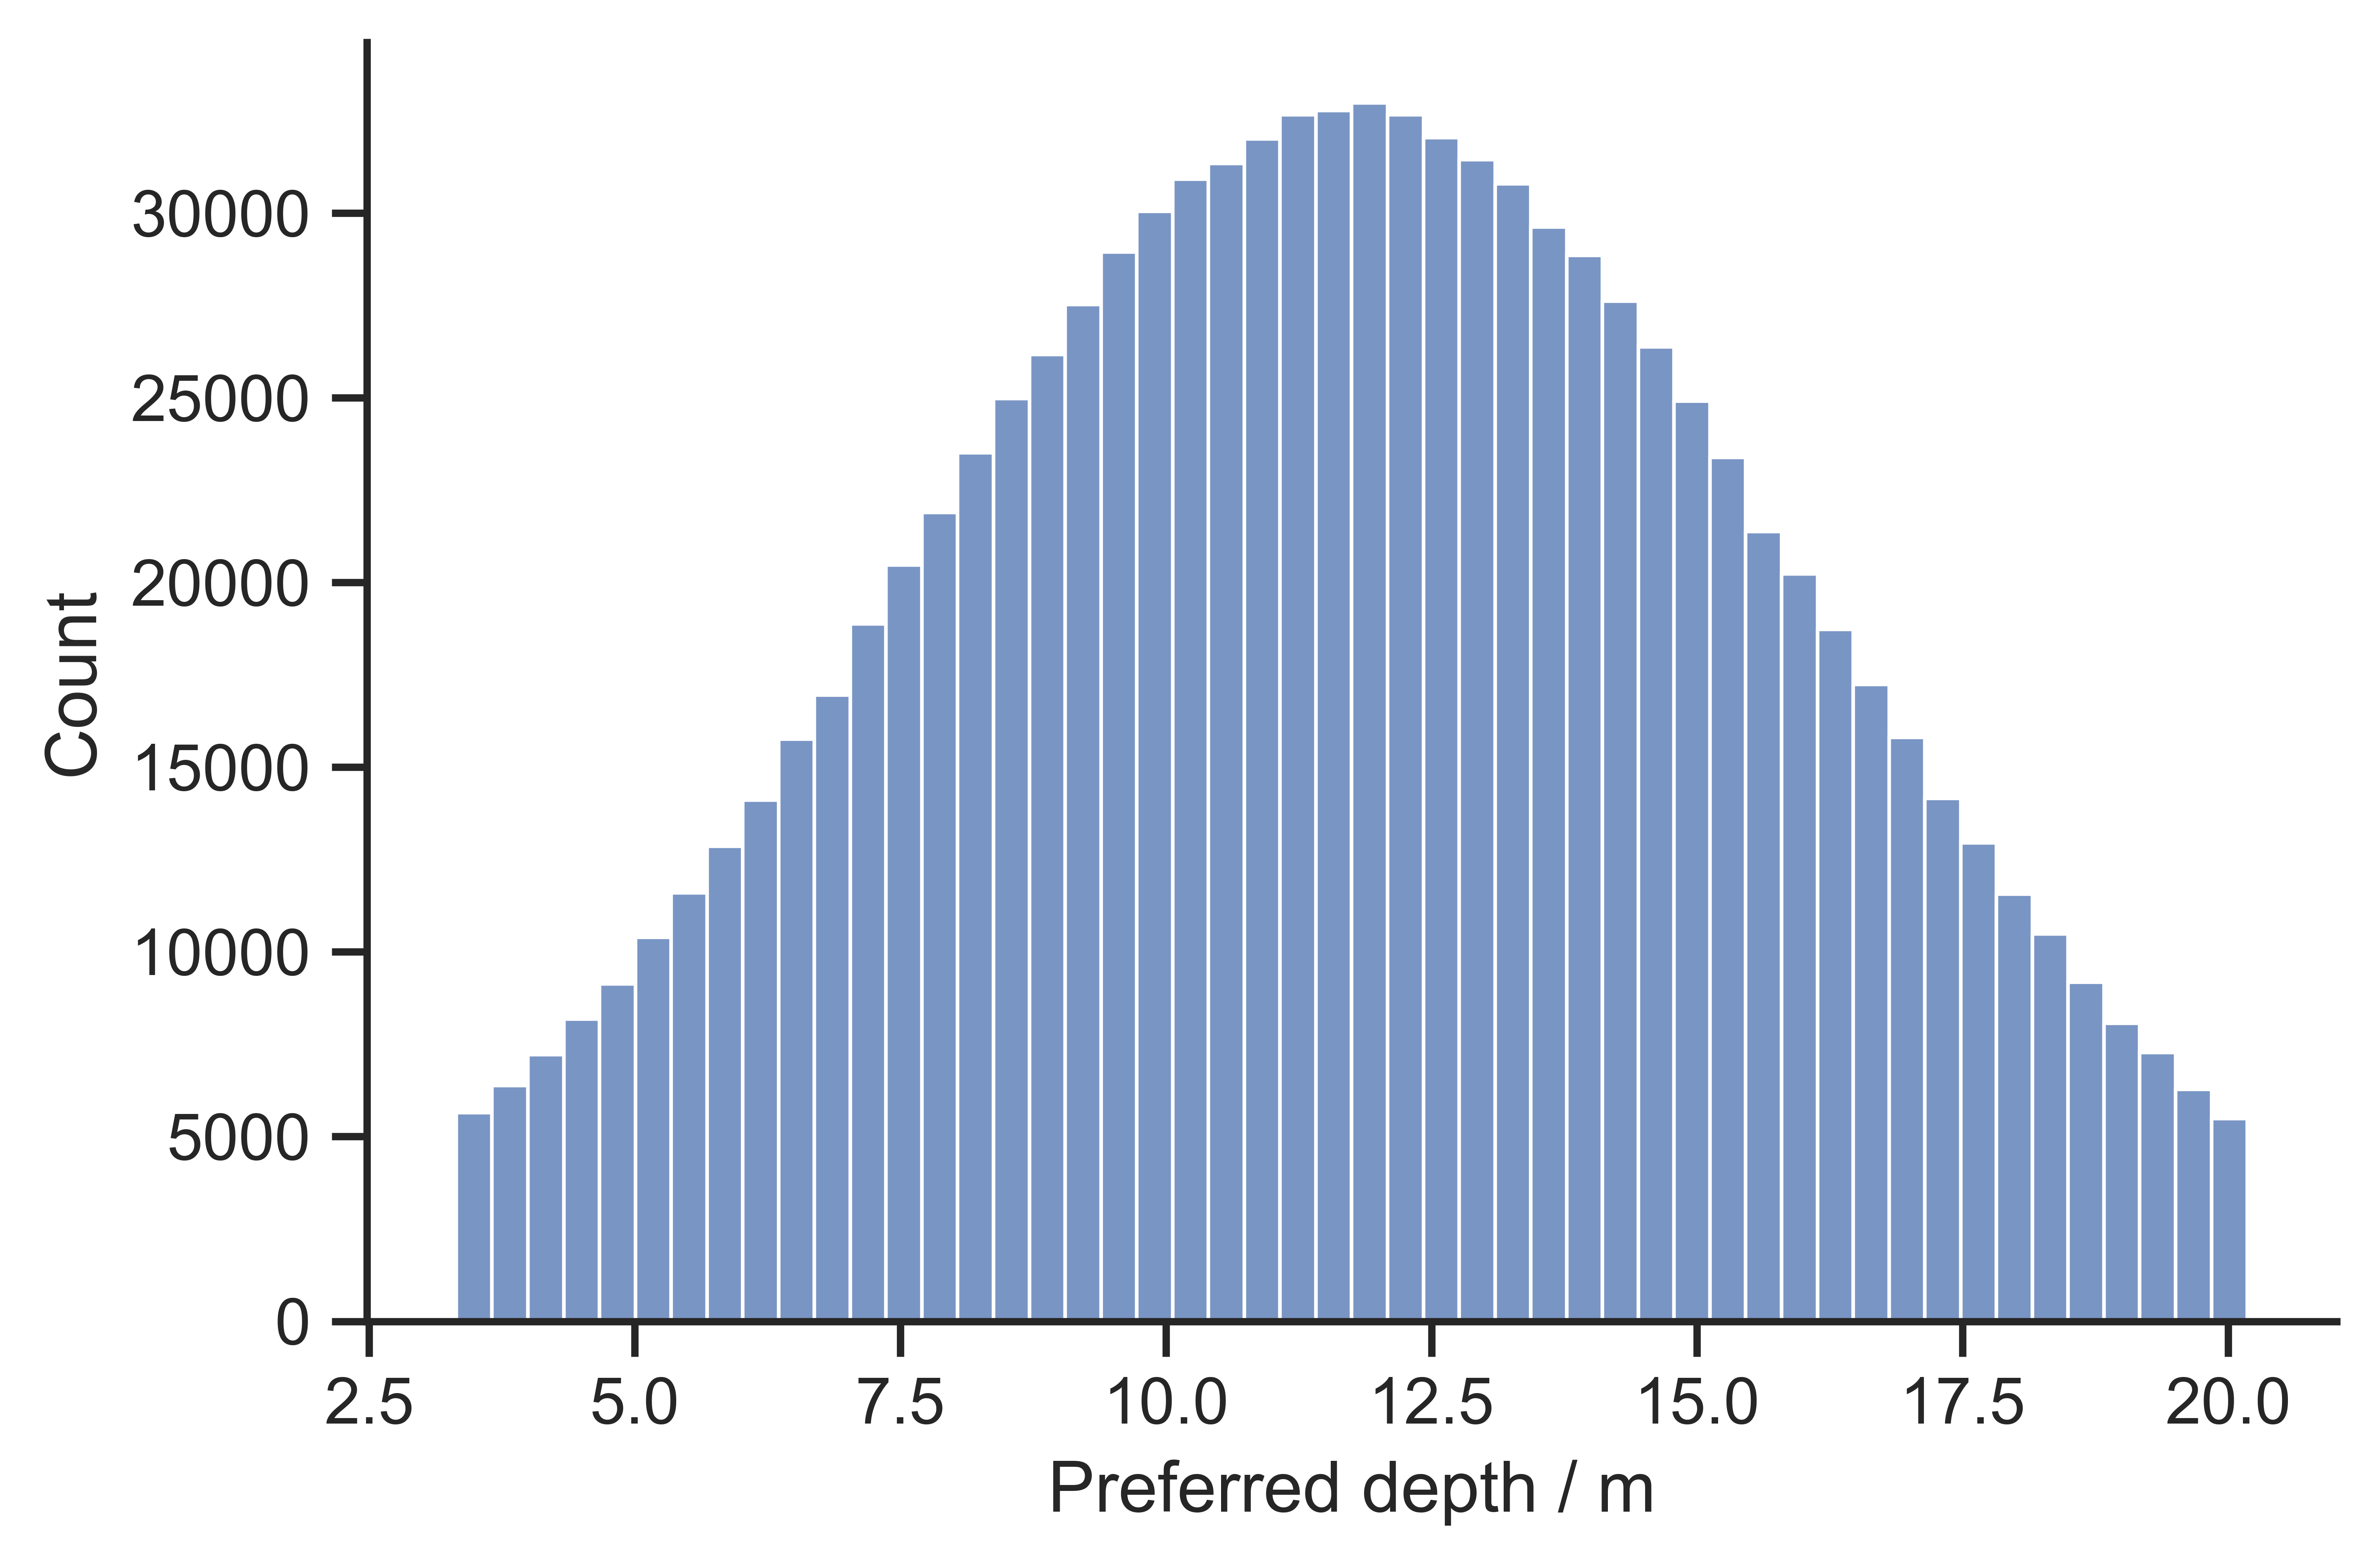

In [36]:
fig, ax = plt.subplots(ncols=1, figsize=(6, 4), dpi=1000, sharey=True)
sns.histplot(depths, bins=50, ax=ax)
ax.set(xlabel='Preferred depth / m')
sns.despine()

plt.show()